In [51]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [4]:
chromium_csv = "Database/Chromium/Chromium.csv"
chromium = pd.read_csv(chromium_csv)
chromium.head()

,STATE_ABBR,AMA_SITE_CODE,AQS_POC,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,AQS_PARAMETER_CODE,AQS_PARAMETER_NAME,...,AQS_QUALIFIER_10,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,SAMPLE_VALUE_FLAG,BELOW_MDL_FLAG,CENSUS_TRACT_ID,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,NJ,340010006,1,IMPROVE,2014,4,14-Oct-14,00:00,88112,Chromium (PM2.5),...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,X-Ray Fluorescence,NaN,NaN,34001010505,3044,39.464872,-74.448736
1,NJ,340010006,1,IMPROVE,2014,4,25-Nov-14,00:00,88112,Chromium (PM2.5),...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,X-Ray Fluorescence,NaN,NaN,34001010505,3044,39.464872,-74.448736
2,NJ,340010006,1,IMPROVE,2014,3,02-Sep-14,00:00,88112,Chromium (PM2.5),...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,X-Ray Fluorescence,NaN,NaN,34001010505,3044,39.464872,-74.448736
3,NJ,340010006,1,IMPROVE,2014,3,05-Sep-14,00:00,88112,Chromium (PM2.5),...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,X-Ray Fluorescence,NaN,NaN,34001010505,3044,39.464872,-74.448736
4,NJ,340010006,1,IMPROVE,2014,3,08-Sep-14,00:00,88112,Chromium (PM2.5),...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,X-Ray Fluorescence,NaN,NaN,34001010505,3044,39.464872,-74.448736


In [6]:
chromium = chromium[['PROGRAM', 'YEAR', 'QUARTER', 'SAMPLE_DATE', 'SAMPLE_START_TIME', 'DURATION_DESC', 
'SAMPLE_VALUE_REPORTED', 'UNIT_DESC', 'SAMPLE_VALUE_STD_FINAL_TYPE', 'MDL_STD_UG_M3', 'CENSUS_TRACT_POPULATION_2010', 'MONITOR_LATITUDE', 
'MONITOR_LONGITUDE']]
chromium.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,IMPROVE,2014,4,14-Oct-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
1,IMPROVE,2014,4,25-Nov-14,00:00,24 HOURS,0.0002,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
2,IMPROVE,2014,3,02-Sep-14,00:00,24 HOURS,0.0005,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
3,IMPROVE,2014,3,05-Sep-14,00:00,24 HOURS,0.0003,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
4,IMPROVE,2014,3,08-Sep-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736


In [10]:
chromium_df = pd.DataFrame(chromium)
chromium_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,IMPROVE,2014,4,14-Oct-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
1,IMPROVE,2014,4,25-Nov-14,00:00,24 HOURS,0.0002,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
2,IMPROVE,2014,3,02-Sep-14,00:00,24 HOURS,0.0005,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
3,IMPROVE,2014,3,05-Sep-14,00:00,24 HOURS,0.0003,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
4,IMPROVE,2014,3,08-Sep-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736


In [11]:
program = chromium_df["PROGRAM"].value_counts()
program

PM2.5 SPECIATION NETWORK      6935
IMPROVE                       2921
CSN SUPPLEMENTAL               320
COMMUNITY-SCALE MONITORING     249
SLAMS                           40
Name: PROGRAM, dtype: int64

<IPython.core.display.Javascript object>


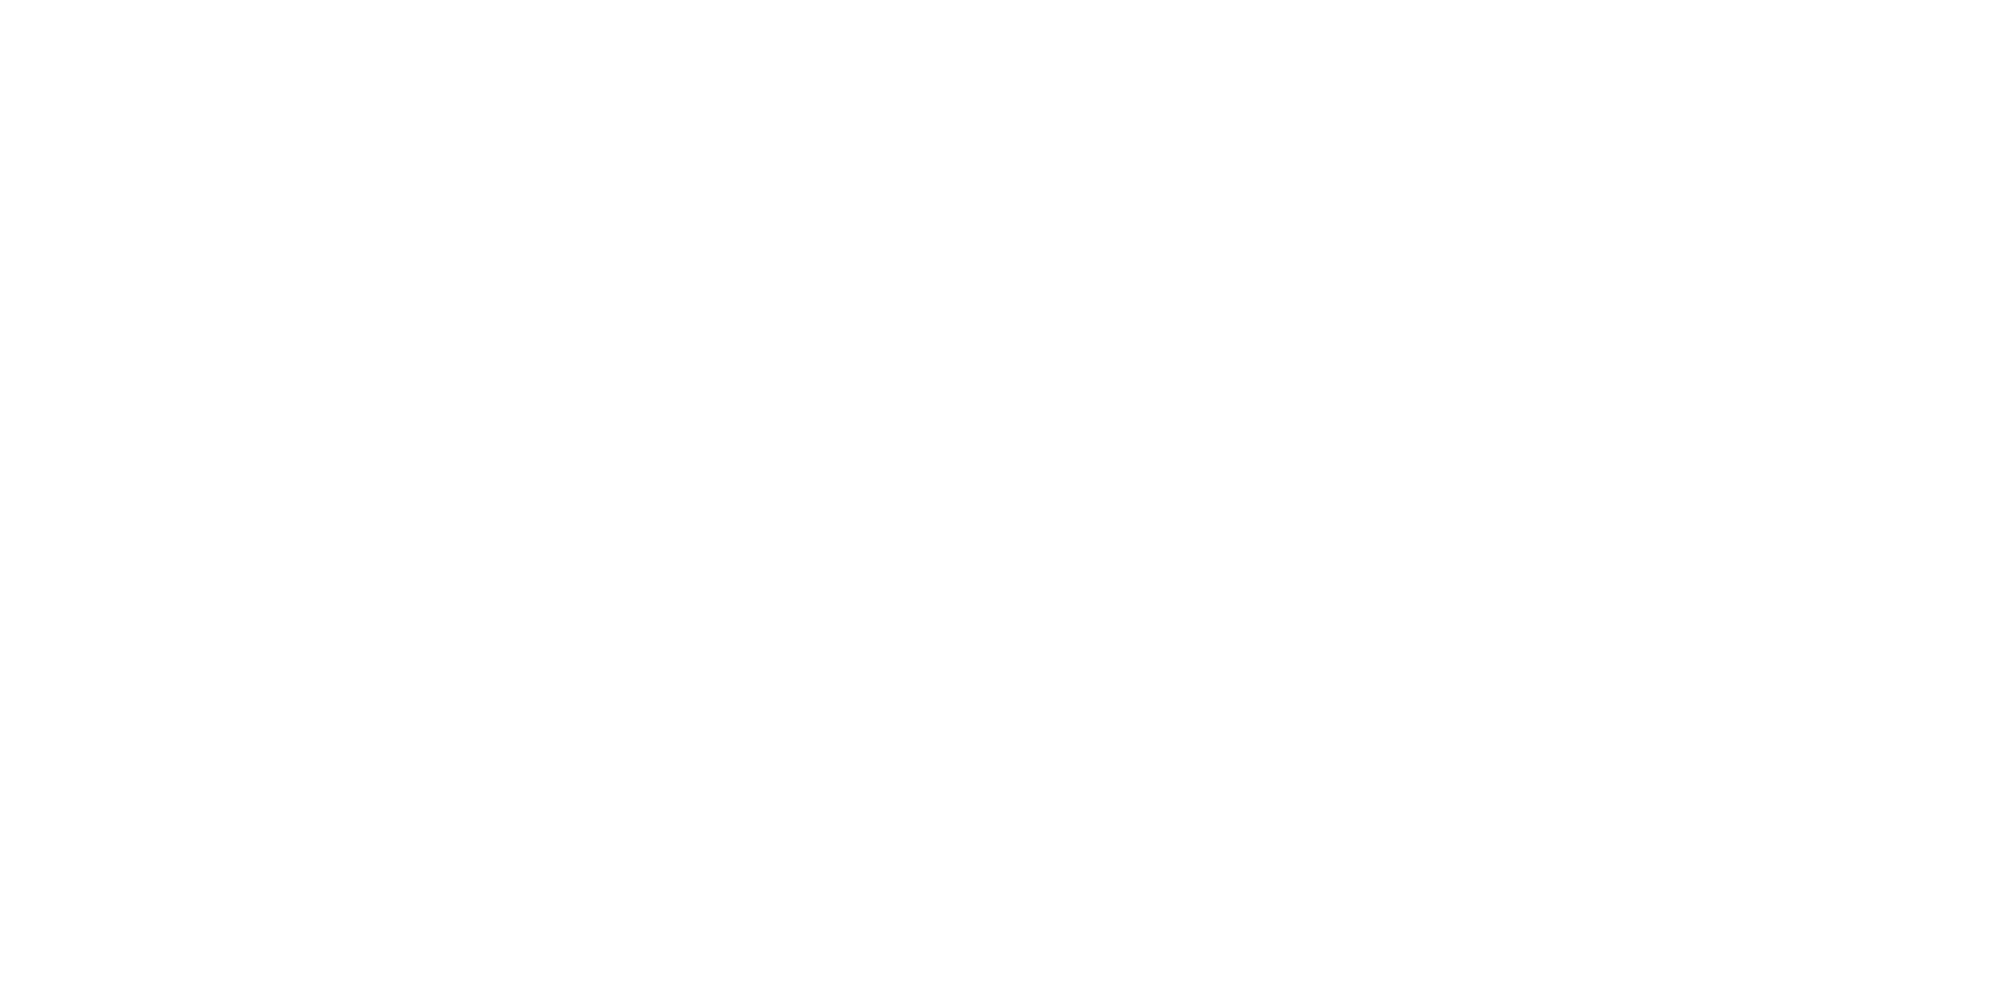

<IPython.core.display.Javascript object>


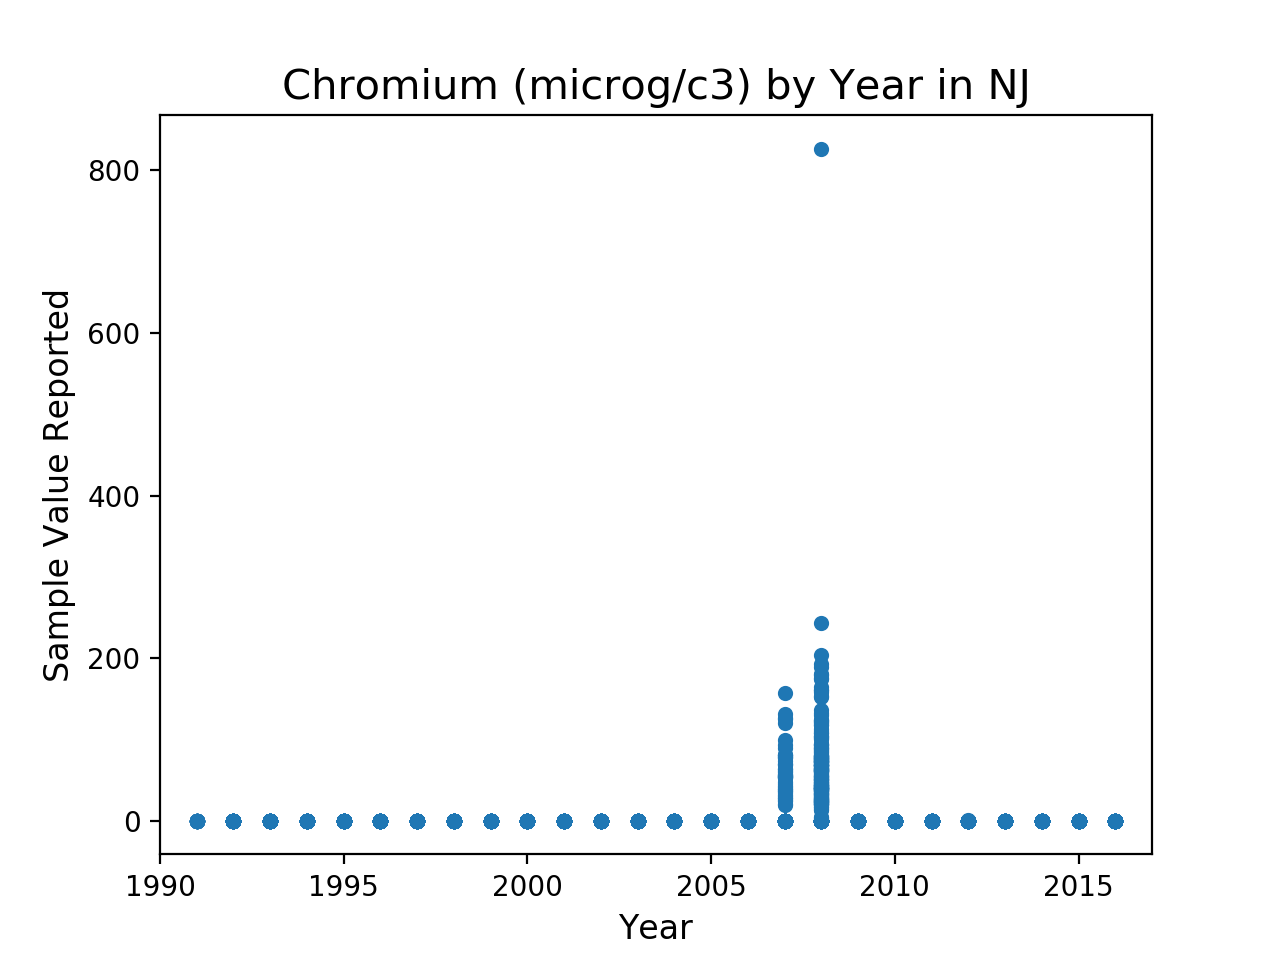

Text(0, 0.5, 'Sample Value Reported')

In [12]:
# Please use this cell
plt.figure(figsize=(10,5))
chromium_df.plot.scatter(x='YEAR', y='SAMPLE_VALUE_REPORTED')
plt.xlim(1990,2017)
plt.title('Chromium (microg/c3) by Year in NJ', size=15)
plt.xlabel('Year', size=12)
plt.ylabel('Sample Value Reported', size=12)
# plt.savefig('Images/sample_value_reported_year.png')

In [14]:
PM2_program_df = chromium_df.loc[chromium_df["PROGRAM"] =="PM2.5 SPECIATION NETWORK"]
PM2_program_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
992,PM2.5 SPECIATION NETWORK,2003,1,15-Jan-03,00:00,24 HOURS,0.00176,UG/CU METER (LC),L,0.0023,6058,39.923042,-75.097617
993,PM2.5 SPECIATION NETWORK,2003,1,10-Mar-03,00:00,24 HOURS,0.00245,UG/CU METER (LC),L,0.0020,6058,39.923042,-75.097617
994,PM2.5 SPECIATION NETWORK,2002,4,28-Nov-02,00:00,24 HOURS,NaN,UG/CU METER (LC),L,0.0015,6058,39.923042,-75.097617
995,PM2.5 SPECIATION NETWORK,2002,4,01-Dec-02,00:00,24 HOURS,0.00176,UG/CU METER (LC),L,0.0023,6058,39.923042,-75.097617
996,PM2.5 SPECIATION NETWORK,2002,4,04-Dec-02,00:00,24 HOURS,NaN,UG/CU METER (LC),L,0.0015,6058,39.923042,-75.097617


In [16]:
sorted_date_PM2 = PM2_program_df.sort_values("YEAR", ascending=False)
sorted_date_PM2.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
9652,PM2.5 SPECIATION NETWORK,2016,1,31-Mar-16,00:00,24 HOURS,-0.00053,UG/CU METER (LC),L,0.00366,3685,40.641440,-74.208365
6260,PM2.5 SPECIATION NETWORK,2016,3,20-Jul-16,00:00,24 HOURS,0.00960,UG/CU METER (LC),L,0.00367,3453,40.720989,-74.192892
6248,PM2.5 SPECIATION NETWORK,2016,2,14-Jun-16,00:00,24 HOURS,0.00385,UG/CU METER (LC),L,0.00368,3453,40.720989,-74.192892
6249,PM2.5 SPECIATION NETWORK,2016,2,20-Jun-16,00:00,24 HOURS,-0.00046,UG/CU METER (LC),L,0.00366,3453,40.720989,-74.192892
6250,PM2.5 SPECIATION NETWORK,2016,3,28-Aug-16,00:00,24 HOURS,0.00306,UG/CU METER (LC),L,0.00367,3453,40.720989,-74.192892


In [17]:
grouped_city= PM2_program_df.groupby(["YEAR"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

,SAMPLE_VALUE_REPORTED
YEAR,
2001,0.0322
2002,0.0539
2003,0.0343
2004,0.0566
2005,0.2790


In [18]:
coordinates = [
    (40.64144, -74.208365),
    (40.720989, -74.192892),
    (40.472825, -74.422403),
    (40.787628, -74.676301),
    (39.923042, -75.097617)
]

In [19]:
figure_layout = {
    'width': '800px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [20]:
markers = gmaps.marker_layer(coordinates)

fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [21]:
improve_program_df = chromium_df.loc[chromium_df["PROGRAM"] =="IMPROVE"]
improve_program_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,IMPROVE,2014,4,14-Oct-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
1,IMPROVE,2014,4,25-Nov-14,00:00,24 HOURS,0.0002,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
2,IMPROVE,2014,3,02-Sep-14,00:00,24 HOURS,0.0005,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
3,IMPROVE,2014,3,05-Sep-14,00:00,24 HOURS,0.0003,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736
4,IMPROVE,2014,3,08-Sep-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736


In [22]:
sorted_date_improve = improve_program_df.sort_values("YEAR", ascending=False)
sorted_date_improve.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
267,IMPROVE,2016,4,02-Dec-16,00:00,24 HOURS,0.00007,UG/CU METER (LC),L,0.00015,3044,39.464872,-74.448736
287,IMPROVE,2016,3,08-Jul-16,00:00,24 HOURS,0.00029,UG/CU METER (LC),L,0.00016,3044,39.464872,-74.448736
285,IMPROVE,2016,3,02-Jul-16,00:00,24 HOURS,0.00002,UG/CU METER (LC),L,0.00015,3044,39.464872,-74.448736
284,IMPROVE,2016,2,29-Jun-16,00:00,24 HOURS,0.00008,UG/CU METER (LC),L,0.00012,3044,39.464872,-74.448736
283,IMPROVE,2016,2,26-Jun-16,00:00,24 HOURS,0.00012,UG/CU METER (LC),L,0.00012,3044,39.464872,-74.448736


In [23]:
grouped_city= improve_program_df.groupby(["YEAR"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

,SAMPLE_VALUE_REPORTED
YEAR,
1991,0.00045
1992,0.00093
1993,0.00322
1994,0.00275
1995,0.00555


In [25]:
community_program_df = chromium_df.loc[chromium_df["PROGRAM"] =="COMMUNITY-SCALE MONITORING"]
community_program_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
310,COMMUNITY-SCALE MONITORING,2008,2,05-Jun-08,00:00,24 HOURS,36.641,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
312,COMMUNITY-SCALE MONITORING,2008,1,13-Mar-08,00:00,24 HOURS,73.458,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
313,COMMUNITY-SCALE MONITORING,2008,1,19-Mar-08,00:00,24 HOURS,76.403,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
314,COMMUNITY-SCALE MONITORING,2008,1,25-Mar-08,00:00,24 HOURS,47.462,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
315,COMMUNITY-SCALE MONITORING,2008,1,31-Mar-08,00:00,24 HOURS,68.641,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758


In [26]:
sorted_date_community = community_program_df.sort_values("YEAR", ascending=False)
sorted_date_community.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
310,COMMUNITY-SCALE MONITORING,2008,2,05-Jun-08,00:00,24 HOURS,36.641,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
1649,COMMUNITY-SCALE MONITORING,2008,1,08-Mar-08,06:00,12 HOUR,33.842,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
1636,COMMUNITY-SCALE MONITORING,2008,1,29-Feb-08,00:00,24 HOURS,40.047,Nanograms/cubic meter (LC),L,0.000002,6127,40.816809,-74.043673
1637,COMMUNITY-SCALE MONITORING,2008,1,23-Feb-08,00:00,24 HOURS,NaN,Nanograms/cubic meter (LC),L,0.000002,6127,40.816809,-74.043673
1638,COMMUNITY-SCALE MONITORING,2008,1,17-Feb-08,00:00,24 HOURS,NaN,Nanograms/cubic meter (LC),L,0.000002,6127,40.816809,-74.043673


In [27]:
grouped_city= community_program_df.groupby(["YEAR"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

,SAMPLE_VALUE_REPORTED
YEAR,
2007,157.163
2008,826.511


In [28]:
csn_program_df = chromium_df.loc[chromium_df["PROGRAM"] =="CSN SUPPLEMENTAL"]
csn_program_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
1148,CSN SUPPLEMENTAL,2016,4,09-Oct-16,00:00,24 HOURS,0.01815,UG/CU METER (LC),L,0.00364,2328,39.934446,-75.125291
1149,CSN SUPPLEMENTAL,2016,4,15-Oct-16,00:00,24 HOURS,0.00287,UG/CU METER (LC),L,0.00365,2328,39.934446,-75.125291
1150,CSN SUPPLEMENTAL,2016,4,21-Oct-16,00:00,24 HOURS,0.00355,UG/CU METER (LC),L,0.00361,2328,39.934446,-75.125291
1151,CSN SUPPLEMENTAL,2016,4,27-Oct-16,00:00,24 HOURS,0.00364,UG/CU METER (LC),L,0.00366,2328,39.934446,-75.125291
1152,CSN SUPPLEMENTAL,2016,4,02-Nov-16,00:00,24 HOURS,0.00393,UG/CU METER (LC),L,0.00364,2328,39.934446,-75.125291


In [29]:
sorted_date_csn = csn_program_df.sort_values("YEAR", ascending=False)
sorted_date_csn.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
1148,CSN SUPPLEMENTAL,2016,4,09-Oct-16,00:00,24 HOURS,0.01815,UG/CU METER (LC),L,0.00364,2328,39.934446,-75.125291
1811,CSN SUPPLEMENTAL,2016,2,17-Jun-16,00:00,24 HOURS,NaN,UG/CU METER (LC),L,0.00344,2328,39.934446,-75.125291
1821,CSN SUPPLEMENTAL,2016,2,29-Jun-16,00:00,24 HOURS,0.00712,UG/CU METER (LC),L,0.00359,2328,39.934446,-75.125291
1820,CSN SUPPLEMENTAL,2016,3,16-Aug-16,00:00,24 HOURS,0.00139,UG/CU METER (LC),L,0.00357,2328,39.934446,-75.125291
1819,CSN SUPPLEMENTAL,2016,2,23-Jun-16,00:00,24 HOURS,NaN,UG/CU METER (LC),L,0.00344,2328,39.934446,-75.125291


In [30]:
grouped_city= csn_program_df.groupby(["YEAR"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

,SAMPLE_VALUE_REPORTED
YEAR,
2013,0.05110
2014,0.11300
2015,0.03350
2016,0.05085


In [31]:
slams_program_df = chromium_df.loc[chromium_df["PROGRAM"] =="SLAMS"]
slams_program_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
5708,SLAMS,2016,4,02-Nov-16,00:00,24 HOURS,0.00406,UG/CU METER (LC),L,0.00367,5231,40.462182,-74.429439
5710,SLAMS,2016,4,29-Nov-16,00:00,24 HOURS,0.00159,UG/CU METER (LC),L,0.00367,5231,40.462182,-74.429439
5711,SLAMS,2016,4,02-Dec-16,00:00,24 HOURS,NaN,UG/CU METER (LC),L,0.00367,5231,40.462182,-74.429439
5712,SLAMS,2016,4,08-Dec-16,00:00,24 HOURS,0.01855,UG/CU METER (LC),L,0.00367,5231,40.462182,-74.429439
5713,SLAMS,2016,4,11-Dec-16,00:00,24 HOURS,0.02432,UG/CU METER (LC),L,0.00367,5231,40.462182,-74.429439


In [32]:
sorted_date_slams = slams_program_df.sort_values("YEAR", ascending=False)
sorted_date_slams.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
5708,SLAMS,2016,4,02-Nov-16,00:00,24 HOURS,0.00406,UG/CU METER (LC),L,0.00367,5231,40.462182,-74.429439
5710,SLAMS,2016,4,29-Nov-16,00:00,24 HOURS,0.00159,UG/CU METER (LC),L,0.00367,5231,40.462182,-74.429439
5735,SLAMS,2016,4,14-Nov-16,00:00,24 HOURS,0.00181,UG/CU METER (LC),L,0.00367,5231,40.462182,-74.429439
5736,SLAMS,2016,4,08-Nov-16,00:00,24 HOURS,0.00088,UG/CU METER (LC),L,0.00367,5231,40.462182,-74.429439
5737,SLAMS,2016,4,17-Nov-16,00:00,24 HOURS,0.01003,UG/CU METER (LC),L,0.00367,5231,40.462182,-74.429439


In [33]:
grouped_city= slams_program_df.groupby(["YEAR"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

,SAMPLE_VALUE_REPORTED
YEAR,
2016,0.0249


In [34]:
breakpoints_sensitive = chromium_df.loc[(chromium_df["SAMPLE_VALUE_REPORTED"]>35.5) &
                              (chromium_df["SAMPLE_VALUE_REPORTED"]<= 55.4)]
breakpoints_sensitive = pd.DataFrame(breakpoints_sensitive)
breakpoints_sensitive.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
310,COMMUNITY-SCALE MONITORING,2008,2,05-Jun-08,00:00,24 HOURS,36.641,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
314,COMMUNITY-SCALE MONITORING,2008,1,25-Mar-08,00:00,24 HOURS,47.462,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
317,COMMUNITY-SCALE MONITORING,2008,2,12-Apr-08,00:00,24 HOURS,44.975,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
322,COMMUNITY-SCALE MONITORING,2008,2,12-May-08,00:00,24 HOURS,51.231,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
323,COMMUNITY-SCALE MONITORING,2008,2,18-May-08,00:00,24 HOURS,55.226,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758


In [35]:
program_count = breakpoints_sensitive["PROGRAM"].value_counts()
program_count.head()

COMMUNITY-SCALE MONITORING    59
Name: PROGRAM, dtype: int64

In [36]:
year_count = breakpoints_sensitive["YEAR"].value_counts()
year_count

2008    45
2007    14
Name: YEAR, dtype: int64

In [37]:
locations = breakpoints_sensitive[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE']]
weights = breakpoints_sensitive['SAMPLE_VALUE_REPORTED']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
breakpoints_unhealthy = chromium_df.loc[(chromium_df["SAMPLE_VALUE_REPORTED"]>=55.5) &
                              (chromium_df["SAMPLE_VALUE_REPORTED"]<= 150.4)]
breakpoints_unhealthy= pd.DataFrame(breakpoints_unhealthy)

breakpoints_unhealthy.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
312,COMMUNITY-SCALE MONITORING,2008,1,13-Mar-08,00:00,24 HOURS,73.458,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
313,COMMUNITY-SCALE MONITORING,2008,1,19-Mar-08,00:00,24 HOURS,76.403,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
315,COMMUNITY-SCALE MONITORING,2008,1,31-Mar-08,00:00,24 HOURS,68.641,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
320,COMMUNITY-SCALE MONITORING,2008,2,30-Apr-08,00:00,24 HOURS,108.443,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
325,COMMUNITY-SCALE MONITORING,2008,3,11-Jul-08,00:00,24 HOURS,75.764,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758


In [40]:
program_count = breakpoints_unhealthy["PROGRAM"].value_counts()
program_count

COMMUNITY-SCALE MONITORING    110
Name: PROGRAM, dtype: int64

In [41]:
year_count = breakpoints_unhealthy["YEAR"].value_counts()
year_count

2008    86
2007    24
Name: YEAR, dtype: int64

In [42]:
locations = breakpoints_unhealthy[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE']]
weights = breakpoints_unhealthy['SAMPLE_VALUE_REPORTED']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
breakpoints_veryunhealthy = chromium_df.loc[(chromium_df["SAMPLE_VALUE_REPORTED"]>=150.5) &
                              (chromium_df["SAMPLE_VALUE_REPORTED"]<= 250.4)]

breakpoints_veryunhealthy.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
318,COMMUNITY-SCALE MONITORING,2008,2,18-Apr-08,00:00,24 HOURS,243.557,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
319,COMMUNITY-SCALE MONITORING,2008,2,24-Apr-08,00:00,24 HOURS,158.336,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
321,COMMUNITY-SCALE MONITORING,2008,2,06-May-08,00:00,24 HOURS,160.772,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
346,COMMUNITY-SCALE MONITORING,2007,3,21-Sep-07,00:00,24 HOURS,157.163,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758
359,COMMUNITY-SCALE MONITORING,2008,1,05-Feb-08,00:00,24 HOURS,189.486,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758


In [44]:
program_count = breakpoints_veryunhealthy["PROGRAM"].value_counts()
program_count

COMMUNITY-SCALE MONITORING    15
Name: PROGRAM, dtype: int64

In [45]:
year_count = breakpoints_veryunhealthy["YEAR"].value_counts()
year_count

2008    14
2007     1
Name: YEAR, dtype: int64

In [46]:
locations = breakpoints_veryunhealthy[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE']]
weights = breakpoints_veryunhealthy['SAMPLE_VALUE_REPORTED']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
breakpoints_hazardous = chromium_df.loc[(chromium_df["SAMPLE_VALUE_REPORTED"]>=250.5)]

breakpoints_hazardous

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
326,COMMUNITY-SCALE MONITORING,2008,3,03-Sep-08,00:00,24 HOURS,826.511,Nanograms/cubic meter (LC),L,0.000002,6127,40.817218,-74.043758


In [48]:
program_count = breakpoints_hazardous["PROGRAM"].value_counts()
program_count

COMMUNITY-SCALE MONITORING    1
Name: PROGRAM, dtype: int64

In [49]:
year_count = breakpoints_hazardous["YEAR"].value_counts()
year_count

2008    1
Name: YEAR, dtype: int64

In [50]:
locations = breakpoints_hazardous[['MONITOR_LATITUDE', 'MONITOR_LONGITUDE']]
weights = breakpoints_hazardous['SAMPLE_VALUE_REPORTED']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [52]:
coordinates = []
for index, row in chromium_df.iterrows(): 
    if (row['MONITOR_LATITUDE'], row['MONITOR_LONGITUDE']) not in coordinates:
        coordinates.append((row['MONITOR_LATITUDE'],row['MONITOR_LONGITUDE']))
# coordinates
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
# cities
city_names = []
for city in cities:
    city_names.append(city.city_name)
city_names

['brigantine',
 'secaucus',
 'camden',
 'camden',
 'little ferry',
 'secaucus',
 'highland park',
 'hopatcong',
 'new brunswick',
 'newark',
 'elizabeth']

In [54]:
city_data = pd.DataFrame({'Coordinates':coordinates,'City Name': city_names})
city_data
city_index = []
for index, row in chromium_df.iterrows():
    for cindex, crow in city_data.iterrows():
        if crow['Coordinates'][1] == row['MONITOR_LONGITUDE']:
            city_index.append(crow['City Name'])
            continue
chromium_df['City'] = city_index            
chromium_df.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,UNIT_DESC,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,City
0,IMPROVE,2014,4,14-Oct-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736,brigantine
1,IMPROVE,2014,4,25-Nov-14,00:00,24 HOURS,0.0002,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736,brigantine
2,IMPROVE,2014,3,02-Sep-14,00:00,24 HOURS,0.0005,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736,brigantine
3,IMPROVE,2014,3,05-Sep-14,00:00,24 HOURS,0.0003,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736,brigantine
4,IMPROVE,2014,3,08-Sep-14,00:00,24 HOURS,0.0001,UG/CU METER (LC),L,0.0001,3044,39.464872,-74.448736,brigantine


In [55]:
grouped_city= chromium_df.groupby(["City"])

city = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

city.head()

,SAMPLE_VALUE_REPORTED
City,
brigantine,0.0112
camden,0.1130
elizabeth,0.2790
highland park,0.5240
hopatcong,0.1900


In [56]:
city_list = grouped_city['City'].value_counts()
city_list
city_list = ['Brigantine', 'Camden', 'Elizabeth', 
             'Highland Park', 'Hopatcong', 'Little Ferry', 'New Brunswick','Newark','Seacaucus']

<IPython.core.display.Javascript object>


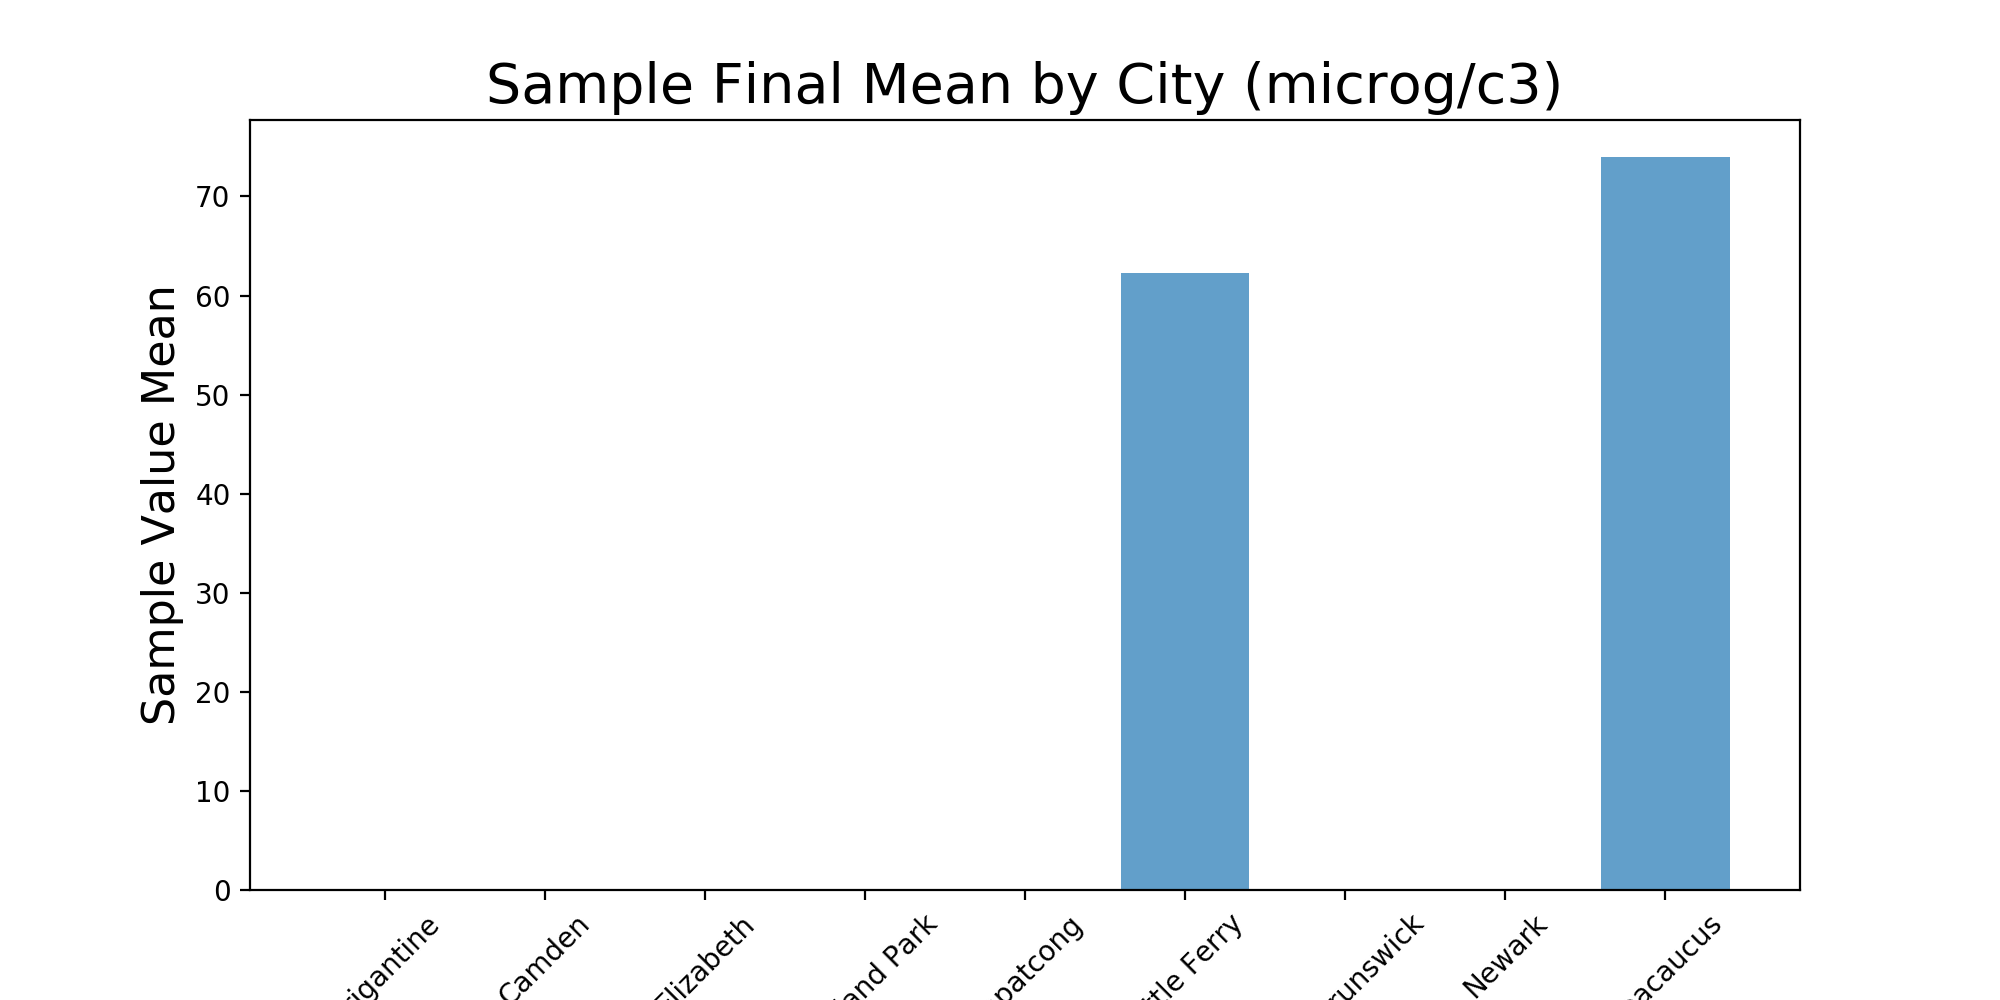

Text(0, 0.5, 'Sample Value Mean')

In [59]:
plt.figure(figsize=(10,5))
plt.bar(city_list,grouped_city['SAMPLE_VALUE_REPORTED'].mean(), alpha=0.7)
# plt.xlim(1989,2017)
plt.title('Sample Final Mean by City (microg/c3)', size=20)
plt.xlabel('City', size=16)
plt.xticks(rotation=45)
plt.ylabel('Sample Value Mean', size=16)
# plt.savefig('Images/Sample_Final_Mean_by_City.png')

In [60]:
grouped_city= chromium_df.groupby(["City", "YEAR", "PROGRAM"])

year = pd.DataFrame(grouped_city["SAMPLE_VALUE_REPORTED"].max())

year.head()

SAMPLE_VALUE_REPORTED
City       YEAR PROGRAM                       
brigantine 1991 IMPROVE                0.00045
           1992 IMPROVE                0.00093
           1993 IMPROVE                0.00322
           1994 IMPROVE                0.00275
           1995 IMPROVE                0.00555

<IPython.core.display.Javascript object>


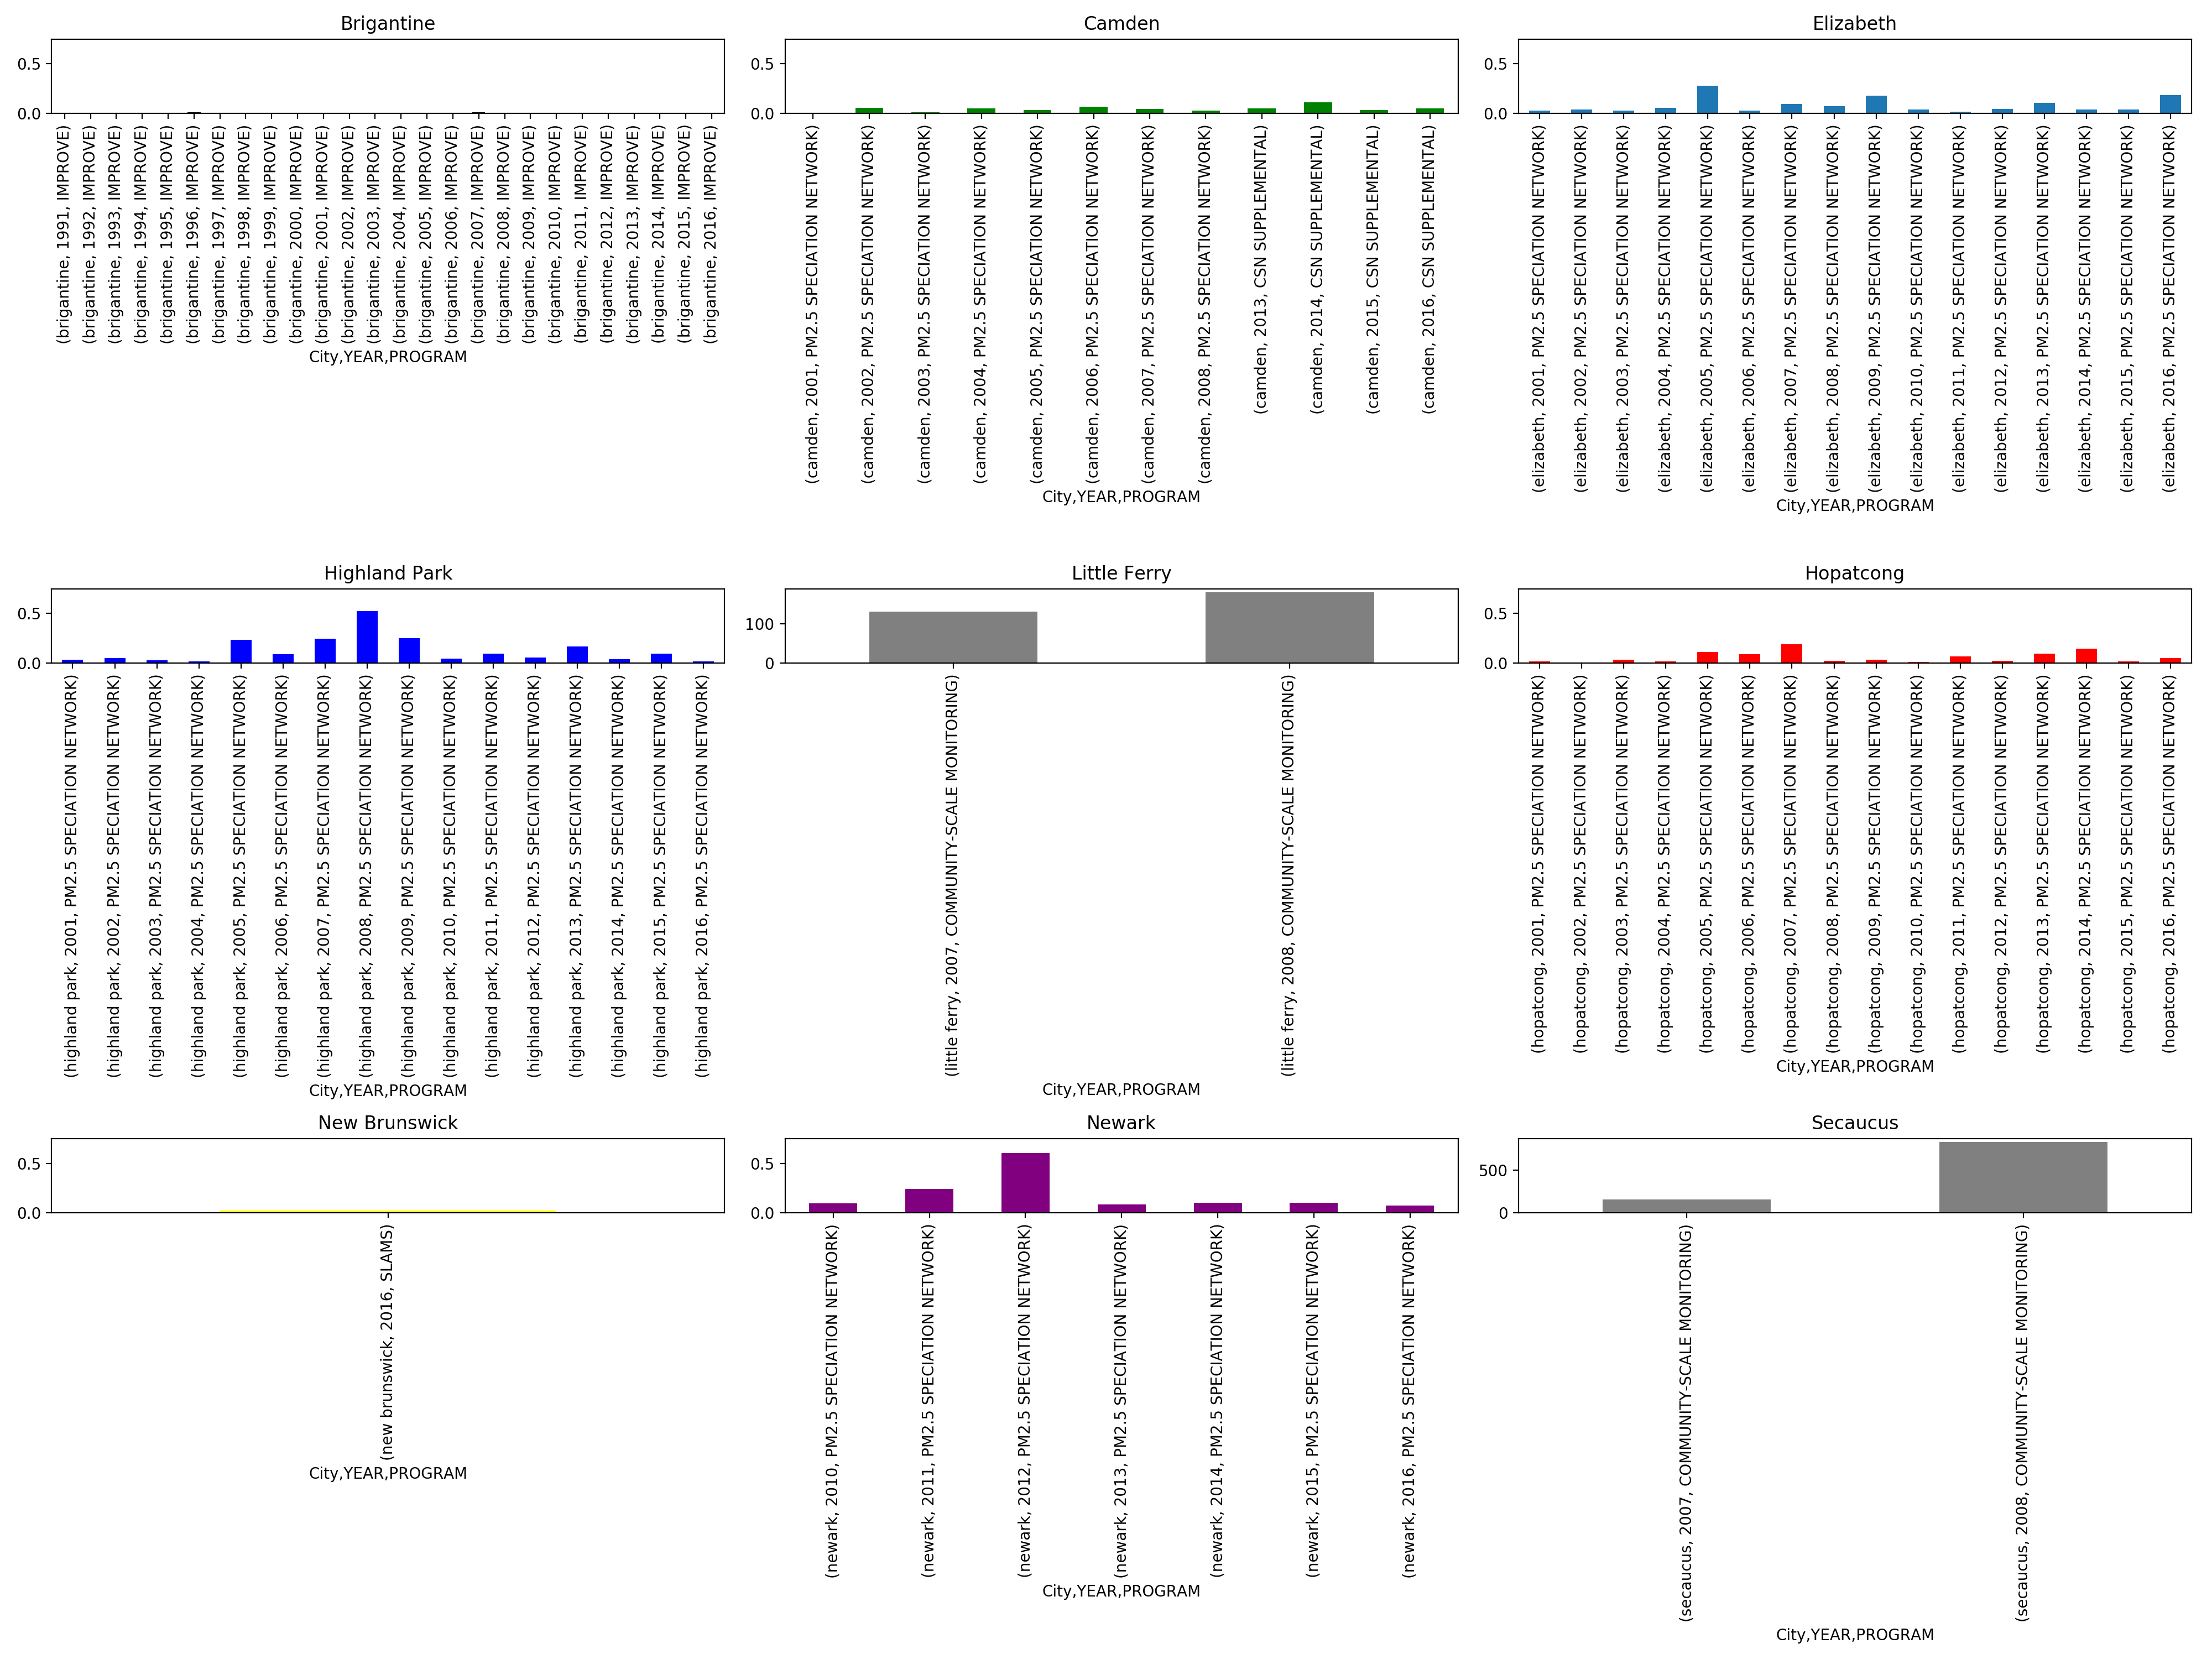

In [85]:
brigantine = pd.DataFrame(year.query('City == [\'brigantine\']'))

camden = pd.DataFrame(year.query('City == [\'camden\']'))

elizabeth = pd.DataFrame(year.query('City == [\'elizabeth\']'))

highland_park = pd.DataFrame(year.query('City == [\'highland park\']'))

little_ferry = pd.DataFrame(year.query('City == [\'little ferry\']'))

hopatcong = pd.DataFrame(year.query('City == [\'hopatcong\']'))

new_brunswick = pd.DataFrame(year.query('City == [\'new brunswick\']'))

newark = pd.DataFrame(year.query('City == [\'newark\']'))

secaucus = pd.DataFrame(year.query('City == [\'secaucus\']'))

# Please take into account Little Ferry and Secaucus

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

brigantine.plot(kind='bar', color='black', ylim=(0,0.75), ax=axes[0,0], legend=False)
axes[0,0].set_title("Brigantine")

camden.plot(kind='bar', color='green', ylim=(0,0.75), ax=axes[0,1], legend=False)
axes[0,1].set_title("Camden")

elizabeth.plot(kind='bar', ylim=(0,0.75), ax=axes[0,2], legend=False)
axes[0,2].set_title("Elizabeth")

highland_park.plot(kind='bar', color='blue', ylim =(0,0.75), ax=axes[1,0], legend=False)
axes[1,0].set_title("Highland Park")

little_ferry.plot(kind='bar', color='gray', ax=axes[1,1], legend=False)
axes[1,1].set_title("Little Ferry")

hopatcong.plot(kind='bar', color='red', ylim = (0,0.75), ax=axes[1,2], legend=False)
axes[1,2].set_title("Hopatcong")

new_brunswick.plot(kind='bar', color = 'yellow', ylim =(0,0.75), ax=axes[2,0], legend=False)
axes[2,0].set_title("New Brunswick")

newark.plot(kind='bar', color='purple', ylim=(0,0.75), ax=axes[2,1], legend=False)
axes[2,1].set_title("Newark")

secaucus.plot(kind='bar', color='gray', ax=axes[2,2], legend=False)
axes[2,2].set_title("Secaucus")

fig.subplots_adjust(hspace=0.75)
plt.tight_layout()

In [89]:
year_list = [1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

brigantine.plot(kind='scatter',x = 'SAMPLE_VALUE_REPORTED', y = 'YEAR' ,color='black', ylim=(0,0.75), ax=axes[0,0], legend=False)
# axes[0,0].set_title("Brigantine")

camden.plot(kind='scatter', y= year_list, color='green', ylim=(0,0.75), ax=axes[0,1], legend=False)
# axes[0,1].set_title("Camden")

elizabeth.plot(kind='scatter', y = year_list, ylim=(0,0.75), ax=axes[0,2], legend=False)
# axes[0,2].set_title("Elizabeth")

highland_park.plot(kind='scatter', y=year_list, color='blue', ylim =(0,0.75), ax=axes[1,0], legend=False)
# axes[1,0].set_title("Highland Park")

little_ferry.plot(kind='scatter', y = year_list, color='gray', ax=axes[1,1], legend=False)
# axes[1,1].set_title("Little Ferry")

hopatcong.plot(kind='scatter', y = year_list, color='red', ylim = (0,0.75), ax=axes[1,2], legend=False)
# axes[1,2].set_title("Hopatcong")

new_brunswick.plot(kind='scatter', y = year_list,  color = 'yellow', ylim =(0,0.75), ax=axes[2,0], legend=False)
# axes[2,0].set_title("New Brunswick")

newark.plot(kind='scatter', y = year_list, color='purple', ylim=(0,0.75), ax=axes[2,1], legend=False)
# axes[2,1].set_title("Newark")

secaucus.plot(kind='scatter', y= year_list, color='brown', ax=axes[2,2], legend=False)
# axes[2,2].set_title("Secaucus")

fig.subplots_adjust(hspace=0.75)
plt.tight_layout()

<IPython.core.display.Javascript object>

KeyError: 'YEAR'